In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn 

import tensorflow as tf
import keras

import os

In [73]:
# Load the dataset (make sure to set the path)
df = pd.read_csv("vanderplanki.csv")

In [74]:
df

,Unnamed: 0,D0,D24,D48,R3,R24,gene_length,ExonN,Paralogs
0,1,3.049831,3.494151,1.836840,5.063169,3.128757,1259,2,O
1,2,1.096369,1.643436,-0.321464,0.736070,1.614264,4529,6,P
2,3,3.933029,4.343837,5.170270,4.424378,3.815149,5586,11,O
3,4,0.639756,-0.656008,-0.877510,-1.075263,1.011351,8920,9,O
4,5,2.459983,-0.039614,-0.330813,-0.259558,2.552977,862,4,P
...,...,...,...,...,...,...,...,...,...
14995,14996,6.717333,6.696644,6.471900,5.506727,6.748680,549,4,O
14996,14997,1.540916,2.296347,1.841658,2.231631,2.020119,1005,2,O
14997,14998,5.134944,5.503081,5.587465,4.704347,5.118015,3058,10,O
14998,14999,7.427295,7.020060,4.781728,5.449490,6.767185,2657,6,O


In [75]:
# Remove ID from the dataset
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# Exploratory data analysis

In [38]:
# Summary statistics of the entire dataset
df.describe()

,gene_length,ExonN,Paralogs,expression
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,3363.834600,5.325267,0.441133,2.496063
std,5607.723995,6.467899,0.496539,2.822133
min,160.000000,1.000000,0.000000,-4.735916
25%,973.000000,2.000000,0.000000,0.472078
50%,1738.000000,4.000000,0.000000,2.699739
75%,3289.250000,6.000000,1.000000,4.372577
max,98112.000000,204.000000,1.000000,12.986027


In [20]:
df.dtypes

D0             float64
D24            float64
D48            float64
R3             float64
R24            float64
gene_length      int64
ExonN            int64
Paralogs        object
dtype: object

In [18]:
# Check are there NA
df.isna().sum()

D0             0
D24            0
D48            0
R3             0
R24            0
gene_length    0
ExonN          0
Paralogs       0
dtype: int64

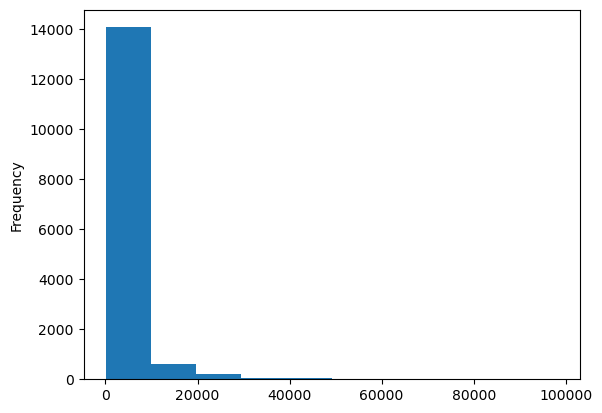

In [17]:
# Create histogram plot of gene_length
df['gene_length'].plot(kind='hist')
plt.show()

In [76]:
df['Paralogs'] = df['Paralogs'].replace({'P':1, 'O':0})

In [24]:
# Compute correlation matrix
corr_matrix = df.corr()

# Find highly correlated pairs of variables
highly_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i] + ' - ' + corr_matrix.columns[j]
            highly_corr.add(colname)
            
highly_corr

{'D24 - D0',
 'D48 - D0',
 'D48 - D24',
 'R24 - D0',
 'R24 - D24',
 'R24 - D48',
 'R24 - R3',
 'R3 - D0',
 'R3 - D24',
 'R3 - D48'}

In [28]:
# As most of expression columns are correlated with each other and their distributions are very similar
# it makes sense to make one average column
df['expression'] = df[['D0', 'D24', 'D48', 'R3', 'R24']].mean(axis=1)

In [36]:
# drop used columns
L_of_drops = ['D0', 'D24', 'D48', 'R3', 'R24']
for i in range(5):
    df = df.drop(L_of_drops[i], axis=1)

In [45]:
# Split the data into input (X) and output (y) variables
from sklearn.model_selection import train_test_split
X = df[["ExonN", "expression", "Paralogs"]]
y = df['gene_length']
X_train, X_test, y_train, y_test = train_test_split(df[["ExonN", "expression", "Paralogs"]], df["gene_length"], test_size=0.2, random_state=42)

In [41]:
# Start from a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# The score is very low, so should try other algorithms
score = model.score(X_test, y_test)
"R-squared:", score

('R-squared:', 0.2388212085251593)

In [46]:
# Try Random Forest Regressor. Should also use GridSearch to find the best max_depth
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [i for i in range(2, 21)]}

rf = RandomForestRegressor(n_estimators=100, random_state=42)

grid_search = GridSearchCV(rf, param_grid=params, cv=5, scoring='r2')
grid_search.fit(X, y)

'Best max_depth:', grid_search.best_params_['max_depth']



('Best max_depth:', 4)

In [48]:
# Use Random Forest Regressor with max_depth 4
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=42)

In [49]:
# Check the testing dataset
y_pred = rf.predict(X_test)

In [50]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [52]:
f'R-squared:{r2}'

'R-squared:0.3081759984338581'

In [53]:
f'MSE:{mse}'

'MSE:25793892.47742226'

In [ ]:
# RandomForestRegressor doesn't perform well, as we see

In [ ]:
# Try Neural  Networks. Feed forward 

In [59]:
# First off, the features must be scaled and  there must be a validation dataset, therefore:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.15, random_state=42)
X_train, X_val,  y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model.fit(X_train, y_train, epochs=250, batch_size = 100, validation_data=(X_val, y_val))




Epoch 1/250
109/109 [==============================] - 1s 5ms/step - loss: 41998516.0000 - mse: 41998516.0000 - mae: 3369.9482 - val_loss: 35420292.0000 - val_mse: 35420288.0000 - val_mae: 3158.4077
Epoch 2/250
109/109 [==============================] - 0s 3ms/step - loss: 41802636.0000 - mse: 41802636.0000 - mae: 3339.6086 - val_loss: 35032448.0000 - val_mse: 35032448.0000 - val_mae: 3095.3757
Epoch 3/250
109/109 [==============================] - 0s 3ms/step - loss: 41041468.0000 - mse: 41041468.0000 - mae: 3222.8071 - val_loss: 33932492.0000 - val_mse: 33932492.0000 - val_mae: 2909.2009
Epoch 4/250
109/109 [==============================] - 0s 3ms/step - loss: 39435892.0000 - mse: 39435892.0000 - mae: 2969.9370 - val_loss: 32049724.0000 - val_mse: 32049724.0000 - val_mae: 2595.9138
Epoch 5/250
109/109 [==============================] - 0s 2ms/step - loss: 37111108.0000 - mse: 37111108.0000 - mae: 2662.2930 - val_loss: 29754364.0000 - val_mse: 29754364.0000 - val_mae: 2314.1235
Epoch

109/109 [==============================] - 0s 2ms/step - loss: 28880424.0000 - mse: 28880424.0000 - mae: 2823.6160 - val_loss: 23826214.0000 - val_mse: 23826214.0000 - val_mae: 2593.7700
Epoch 43/250
109/109 [==============================] - 0s 2ms/step - loss: 28808388.0000 - mse: 28808388.0000 - mae: 2804.7588 - val_loss: 23764204.0000 - val_mse: 23764204.0000 - val_mae: 2587.3750
Epoch 44/250
109/109 [==============================] - 0s 3ms/step - loss: 28734044.0000 - mse: 28734046.0000 - mae: 2812.4956 - val_loss: 23697144.0000 - val_mse: 23697144.0000 - val_mae: 2582.1201
Epoch 45/250
109/109 [==============================] - 0s 2ms/step - loss: 28656152.0000 - mse: 28656152.0000 - mae: 2821.4741 - val_loss: 23615348.0000 - val_mse: 23615348.0000 - val_mae: 2558.0015
Epoch 46/250
109/109 [==============================] - 0s 3ms/step - loss: 28577370.0000 - mse: 28577370.0000 - mae: 2801.7305 - val_loss: 23550594.0000 - val_mse: 23550594.0000 - val_mae: 2561.8635
Epoch 47/250


109/109 [==============================] - 0s 2ms/step - loss: 23182296.0000 - mse: 23182296.0000 - mae: 2353.4583 - val_loss: 18783212.0000 - val_mse: 18783212.0000 - val_mae: 2181.8350
Epoch 84/250
109/109 [==============================] - 0s 2ms/step - loss: 23074108.0000 - mse: 23074108.0000 - mae: 2359.7212 - val_loss: 18660596.0000 - val_mse: 18660596.0000 - val_mae: 2130.5164
Epoch 85/250
109/109 [==============================] - 0s 3ms/step - loss: 22978076.0000 - mse: 22978076.0000 - mae: 2328.8450 - val_loss: 18582614.0000 - val_mse: 18582614.0000 - val_mae: 2145.3884
Epoch 86/250
109/109 [==============================] - 0s 2ms/step - loss: 22888284.0000 - mse: 22888284.0000 - mae: 2333.3308 - val_loss: 18480176.0000 - val_mse: 18480176.0000 - val_mae: 2108.0076
Epoch 87/250
109/109 [==============================] - 0s 3ms/step - loss: 22806208.0000 - mse: 22806208.0000 - mae: 2303.0098 - val_loss: 18437960.0000 - val_mse: 18437958.0000 - val_mae: 2154.3345
Epoch 88/250


Epoch 124/250
109/109 [==============================] - 0s 2ms/step - loss: 22093502.0000 - mse: 22093502.0000 - mae: 2160.2463 - val_loss: 17657992.0000 - val_mse: 17657992.0000 - val_mae: 2010.3652
Epoch 125/250
109/109 [==============================] - 0s 3ms/step - loss: 22086108.0000 - mse: 22086108.0000 - mae: 2186.3547 - val_loss: 17627992.0000 - val_mse: 17627992.0000 - val_mae: 1962.8887
Epoch 126/250
109/109 [==============================] - 0s 3ms/step - loss: 22092792.0000 - mse: 22092792.0000 - mae: 2167.6306 - val_loss: 17636692.0000 - val_mse: 17636692.0000 - val_mae: 1988.6044
Epoch 127/250
109/109 [==============================] - 0s 3ms/step - loss: 22075046.0000 - mse: 22075044.0000 - mae: 2178.3706 - val_loss: 17613292.0000 - val_mse: 17613292.0000 - val_mae: 1923.4045
Epoch 128/250
109/109 [==============================] - 0s 2ms/step - loss: 22077954.0000 - mse: 22077954.0000 - mae: 2145.8953 - val_loss: 17640154.0000 - val_mse: 17640154.0000 - val_mae: 2008.

Epoch 165/250
109/109 [==============================] - 0s 2ms/step - loss: 21862862.0000 - mse: 21862862.0000 - mae: 2141.7993 - val_loss: 17453768.0000 - val_mse: 17453768.0000 - val_mae: 1911.7737
Epoch 166/250
109/109 [==============================] - 0s 2ms/step - loss: 21858920.0000 - mse: 21858920.0000 - mae: 2130.0979 - val_loss: 17461646.0000 - val_mse: 17461646.0000 - val_mae: 1948.5486
Epoch 167/250
109/109 [==============================] - 0s 2ms/step - loss: 21850394.0000 - mse: 21850394.0000 - mae: 2149.9834 - val_loss: 17460410.0000 - val_mse: 17460410.0000 - val_mae: 1956.9708
Epoch 168/250
109/109 [==============================] - 0s 3ms/step - loss: 21839208.0000 - mse: 21839208.0000 - mae: 2151.2798 - val_loss: 17440326.0000 - val_mse: 17440326.0000 - val_mae: 1909.3264
Epoch 169/250
109/109 [==============================] - 0s 3ms/step - loss: 21835122.0000 - mse: 21835122.0000 - mae: 2114.8801 - val_loss: 17468038.0000 - val_mse: 17468038.0000 - val_mae: 1980.

Epoch 206/250
109/109 [==============================] - 0s 3ms/step - loss: 21536290.0000 - mse: 21536290.0000 - mae: 2103.3330 - val_loss: 17286964.0000 - val_mse: 17286964.0000 - val_mae: 1943.7709
Epoch 207/250
109/109 [==============================] - 0s 3ms/step - loss: 21532466.0000 - mse: 21532466.0000 - mae: 2118.5554 - val_loss: 17271466.0000 - val_mse: 17271466.0000 - val_mae: 1920.9462
Epoch 208/250
109/109 [==============================] - 0s 3ms/step - loss: 21515386.0000 - mse: 21515388.0000 - mae: 2104.3201 - val_loss: 17316612.0000 - val_mse: 17316612.0000 - val_mae: 1992.7759
Epoch 209/250
109/109 [==============================] - 0s 3ms/step - loss: 21510502.0000 - mse: 21510502.0000 - mae: 2111.7952 - val_loss: 17286962.0000 - val_mse: 17286962.0000 - val_mae: 1964.1858
Epoch 210/250
109/109 [==============================] - 0s 3ms/step - loss: 21503708.0000 - mse: 21503708.0000 - mae: 2126.8218 - val_loss: 17250328.0000 - val_mse: 17250328.0000 - val_mae: 1903.

Epoch 247/250
109/109 [==============================] - 0s 3ms/step - loss: 21212294.0000 - mse: 21212294.0000 - mae: 2091.4702 - val_loss: 17122122.0000 - val_mse: 17122122.0000 - val_mae: 1884.7629
Epoch 248/250
109/109 [==============================] - 0s 3ms/step - loss: 21209242.0000 - mse: 21209242.0000 - mae: 2079.9961 - val_loss: 17152966.0000 - val_mse: 17152966.0000 - val_mae: 1948.0963
Epoch 249/250
109/109 [==============================] - 0s 3ms/step - loss: 21198358.0000 - mse: 21198360.0000 - mae: 2100.3459 - val_loss: 17127036.0000 - val_mse: 17127038.0000 - val_mae: 1917.4819
Epoch 250/250
109/109 [==============================] - 0s 3ms/step - loss: 21187262.0000 - mse: 21187262.0000 - mae: 2086.4041 - val_loss: 17170290.0000 - val_mse: 17170290.0000 - val_mae: 1975.2104


In [71]:
test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 30323706.0000 - mse: 30323706.0000 - mae: 2271.3337


In [77]:
# As the model predicts very badly, let try to stay D0-R24 features. The file was read again, Unnamed column was dropped and
# Paralogs column turned out numerical.
df = pd.read_csv("C:/Users/aisin/Desktop/Files/For Python/P. vanderplanki dataset/vanderplanki.csv")
df = df.drop('Unnamed: 0', axis=1)
df['Paralogs'] = df['Paralogs'].replace({'P':1, 'O':0})


X, y = df[['D0', 'D24', 'D48', 'R3', 'R24', 'Paralogs', 'ExonN']], df['gene_length']

scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=X.columns)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.15, random_state=42)
X_train, X_val,  y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [95]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model.fit(X_train, y_train, epochs=83, batch_size = 100, validation_data=(X_val, y_val))

Epoch 1/83
109/109 [==============================] - 1s 4ms/step - loss: 41988320.0000 - mse: 41988320.0000 - mae: 3368.2642 - val_loss: 35374308.0000 - val_mse: 35374308.0000 - val_mae: 3151.3643
Epoch 2/83
109/109 [==============================] - 0s 2ms/step - loss: 41571372.0000 - mse: 41571372.0000 - mae: 3304.5850 - val_loss: 34505760.0000 - val_mse: 34505760.0000 - val_mae: 3011.1763
Epoch 3/83
109/109 [==============================] - 0s 2ms/step - loss: 39843856.0000 - mse: 39843856.0000 - mae: 3043.7898 - val_loss: 32103976.0000 - val_mse: 32103976.0000 - val_mae: 2614.2773
Epoch 4/83
109/109 [==============================] - 0s 2ms/step - loss: 36655436.0000 - mse: 36655436.0000 - mae: 2621.5759 - val_loss: 28819846.0000 - val_mse: 28819846.0000 - val_mae: 2241.7527
Epoch 5/83
109/109 [==============================] - 0s 2ms/step - loss: 33415876.0000 - mse: 33415876.0000 - mae: 2443.6509 - val_loss: 26521992.0000 - val_mse: 26521992.0000 - val_mae: 2261.9302
Epoch 6/83

109/109 [==============================] - 0s 2ms/step - loss: 29220040.0000 - mse: 29220040.0000 - mae: 2795.3242 - val_loss: 24101060.0000 - val_mse: 24101060.0000 - val_mae: 2581.7505
Epoch 43/83
109/109 [==============================] - 0s 2ms/step - loss: 29128070.0000 - mse: 29128070.0000 - mae: 2812.4873 - val_loss: 24021890.0000 - val_mse: 24021890.0000 - val_mae: 2574.8779
Epoch 44/83
109/109 [==============================] - 0s 2ms/step - loss: 29034836.0000 - mse: 29034836.0000 - mae: 2815.4724 - val_loss: 23937362.0000 - val_mse: 23937362.0000 - val_mae: 2561.6565
Epoch 45/83
109/109 [==============================] - 0s 2ms/step - loss: 28937936.0000 - mse: 28937936.0000 - mae: 2795.3667 - val_loss: 23862410.0000 - val_mse: 23862410.0000 - val_mae: 2568.6584
Epoch 46/83
109/109 [==============================] - 0s 2ms/step - loss: 28834270.0000 - mse: 28834270.0000 - mae: 2792.7776 - val_loss: 23791298.0000 - val_mse: 23791298.0000 - val_mae: 2583.9126
Epoch 47/83
109/1

109/109 [==============================] - 0s 2ms/step - loss: 22964320.0000 - mse: 22964320.0000 - mae: 2361.5669 - val_loss: 18666170.0000 - val_mse: 18666170.0000 - val_mae: 2075.6196


In [105]:
test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 32432412.0000 - mse: 32432412.0000 - mae: 2357.4653


In [106]:
# Try to improve the model by changing the architecture a little bit
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model.fit(X_train, y_train, epochs=100, batch_size = 100, validation_data=(X_val, y_val))

Epoch 1/100
109/109 [==============================] - 1s 5ms/step - loss: 41985272.0000 - mse: 41985272.0000 - mae: 3368.0195 - val_loss: 35330012.0000 - val_mse: 35330008.0000 - val_mae: 3144.4490
Epoch 2/100
109/109 [==============================] - 0s 2ms/step - loss: 40921144.0000 - mse: 40921144.0000 - mae: 3203.0847 - val_loss: 32682398.0000 - val_mse: 32682400.0000 - val_mae: 2706.5554
Epoch 3/100
109/109 [==============================] - 0s 2ms/step - loss: 35444284.0000 - mse: 35444284.0000 - mae: 2577.4167 - val_loss: 26421286.0000 - val_mse: 26421286.0000 - val_mae: 2274.3699
Epoch 4/100
109/109 [==============================] - 0s 2ms/step - loss: 31266148.0000 - mse: 31266148.0000 - mae: 2737.6392 - val_loss: 25719364.0000 - val_mse: 25719364.0000 - val_mae: 2625.2661
Epoch 5/100
109/109 [==============================] - 0s 2ms/step - loss: 31017938.0000 - mse: 31017938.0000 - mae: 2866.3701 - val_loss: 25635284.0000 - val_mse: 25635284.0000 - val_mae: 2624.3418
Epoch

109/109 [==============================] - 0s 3ms/step - loss: 21855900.0000 - mse: 21855900.0000 - mae: 2213.2786 - val_loss: 17648640.0000 - val_mse: 17648640.0000 - val_mae: 2044.1980
Epoch 43/100
109/109 [==============================] - 0s 2ms/step - loss: 21775824.0000 - mse: 21775824.0000 - mae: 2176.9399 - val_loss: 17574648.0000 - val_mse: 17574648.0000 - val_mae: 2000.6936
Epoch 44/100
109/109 [==============================] - 0s 3ms/step - loss: 21718218.0000 - mse: 21718218.0000 - mae: 2187.2026 - val_loss: 17518636.0000 - val_mse: 17518636.0000 - val_mae: 1956.0913
Epoch 45/100
109/109 [==============================] - 0s 2ms/step - loss: 21674146.0000 - mse: 21674146.0000 - mae: 2167.7034 - val_loss: 17473878.0000 - val_mse: 17473878.0000 - val_mae: 1952.7244
Epoch 46/100
109/109 [==============================] - 0s 3ms/step - loss: 21649258.0000 - mse: 21649258.0000 - mae: 2150.6626 - val_loss: 17470014.0000 - val_mse: 17470014.0000 - val_mae: 1991.6742
Epoch 47/100


109/109 [==============================] - 0s 2ms/step - loss: 20938450.0000 - mse: 20938450.0000 - mae: 2089.1323 - val_loss: 17139972.0000 - val_mse: 17139972.0000 - val_mae: 2011.4749
Epoch 84/100
109/109 [==============================] - 0s 2ms/step - loss: 20948148.0000 - mse: 20948148.0000 - mae: 2098.9766 - val_loss: 17073896.0000 - val_mse: 17073896.0000 - val_mae: 1948.1099
Epoch 85/100
109/109 [==============================] - 0s 2ms/step - loss: 20913200.0000 - mse: 20913198.0000 - mae: 2092.5952 - val_loss: 17056970.0000 - val_mse: 17056970.0000 - val_mae: 1893.8687
Epoch 86/100
109/109 [==============================] - 0s 2ms/step - loss: 20906886.0000 - mse: 20906886.0000 - mae: 2097.6580 - val_loss: 17109814.0000 - val_mse: 17109814.0000 - val_mae: 1997.8677
Epoch 87/100
109/109 [==============================] - 0s 2ms/step - loss: 20916652.0000 - mse: 20916650.0000 - mae: 2096.6716 - val_loss: 17101414.0000 - val_mse: 17101414.0000 - val_mae: 1994.1617
Epoch 88/100


In [107]:
# Performs a little bit better
test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 29535660.0000 - mse: 29535660.0000 - mae: 2246.5791
